Forward

In [4]:
# set some inputs
x = -2; y = 5; z = -4

# perform the forward pass
q = x + y # q becomes 3
f = q * z # f becomes -12

# perform the backward pass (backpropagation) in reverse order:
# first backprop through f = q * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
# now backprop through q = x + y
dfdx = 1.0 * dfdq # dq/dx = 1. And the multiplication here is the chain rule!
dfdy = 1.0 * dfdq # dq/dy = 1

Back Propagation

In [5]:
x = 3; y = -4; z = 2;w=-1
p=x*y
q=max(z,w)
f=2*(p+q)
dfdf=1
dfdp = 2*dfdf
dfdq = 2*dfdf
dpdx=y
dpdy=x
dfdx=dfdp*dpdx
dfdy=dfdp*dpdy
dfdz=0;dfdw=0;
if z>w:
    dfdz=dfdq
else:
    dfdw=dfdq
print('x={},y={},z={},w={},p={},q={},f={}'.format(x,y,x,w,p,q,f))
print('dfdf={},dfdp={},dfdq={},dpdx={},dpdy={},dfdx={},dfdy={},dfdz={},dfdw={}'.format(dfdf,dfdp,dfdq,dpdx,dpdy,dfdx,dfdy,dfdz,dfdw))


x=3,y=-4,z=3,w=-1,p=-12,q=2,f=-20
dfdf=1,dfdp=2,dfdq=2,dpdx=-4,dpdy=3,dfdx=-8,dfdy=6,dfdz=2,dfdw=0


Case 2:

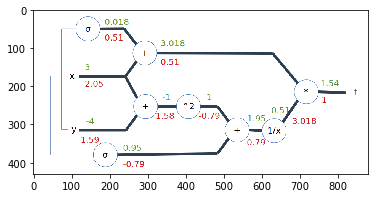

In [13]:
img  = Image.open('backprob.png')
data = np.asarray(img)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data, interpolation='nearest')
ax.set_aspect(1)
plt.show()

img.show()

Forward

In [9]:
import math
x = 3 # example values
y = -4

# forward pass
sigy = 1.0 / (1 + math.exp(-y)) # sigmoid in numerator   #(1)
num = x + sigy # numerator                               #(2)
sigx = 1.0 / (1 + math.exp(-x)) # sigmoid in denominator #(3)
xpy = x + y                                              #(4)
xpysqr = xpy**2                                          #(5)
den = sigx + xpysqr # denominator                        #(6)
invden = 1.0 / den                                       #(7)
f = num * invden # done!                
print('sigy:{}, num:{}, sigx:{}, xpy:{}, xpysqr:{}, den:{}, invden:{},f:{}'.format(sigy, num, sigx, xpy, xpysqr, den, invden,f))

sigy:0.01798620996209156, num:3.0179862099620918, sigx:0.9525741268224334, xpy:-1, xpysqr:1, den:1.9525741268224333, invden:0.5121444488396316,f:1.5456448841066441


In [11]:
# backprop f = num * invden
dnum = invden # gradient on numerator                             #(8)
dinvden = num                                                     #(8)
# backprop invden = 1.0 / den 
dden = (-1.0 / (den**2)) * dinvden                                #(7)
# backprop den = sigx + xpysqr
dsigx = (1) * dden                                                #(6)
dxpysqr = (1) * dden                                              #(6)
# backprop xpysqr = xpy**2
dxpy = (2 * xpy) * dxpysqr                                        #(5)
# backprop xpy = x + y
dx = (1) * dxpy                                                   #(4)
dy = (1) * dxpy                                                   #(4)
# backprop sigx = 1.0 / (1 + math.exp(-x))
dx += ((1 - sigx) * sigx) * dsigx # Notice += !! See notes below  #(3)
# backprop num = x + sigy
dx += (1) * dnum                                                  #(2)
dsigy = (1) * dnum                                                #(2)
# backprop sigy = 1.0 / (1 + math.exp(-y))
dy += ((1 - sigy) * sigy) * dsigy                                 #(1)
print('dsigy:{}, dnum:{}, dsigx:{}, dxpy:{}, dxpysqr:{}, dden:{}, dinvden:{},dx:{},dy:{}'.format(dsigy, dnum, dsigx, dxpy, dxpysqr, dden, dinvden,dx,dy))

dsigy:0.5121444488396316, dnum:0.5121444488396316, dsigx:-0.7915934472725935, dxpy:1.583186894545187, dxpysqr:-0.7915934472725935, dden:-0.7915934472725935, dinvden:3.0179862099620918,dx:2.0595697955721652,dy:1.5922327514838093
